<a href="https://colab.research.google.com/github/BrandonTayKaiheng/Dynamical-Analysis-of-Universal-Masking-on-the-Pandemic/blob/main/Compartmentalized_Model_for_COVID19_Analysis_in_Singapore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SEIR Model for COVID19 Mask Wearing Analysis


**Authors:** Brandon Tay Kaiheng, Jodi Wu Wenjiang, Andrea Carvalho Roby

**Introduction:**
Enforcement of Public Masking was enforced 89 days after the first case was detected in Sinagpore. To study the effect of the delay of public masking enforcement in Singapore, compartmentalized disease was implemented. The study was carried out over a series of 3 scenarios;
1. Complete Compliance to the government
2. Some flouting of masking enforcement after Phase 2
3. 90 day time-limited immunity of COVID19
Research findings and discussion are documented in our research paper: 
https://arxiv.org/abs/2011.11920v1

**Author's Notes:**
1. These models were created using epidemiological data from Singapore 2020
2. These models do not account for simultaneous implementation of multiple policies (Circuit Breaker, Stay home notice etc)

**Instructions:**
1. Run code
2. Enter an integer value for "number of days that mask wearing was delayed"
3. To try another value, simply re-run the code cell again

Scenario 1: Complete Compliance

How many days was compulsory mask wearing delayed? 89
Day Peak Infection occurs:  95
Maximum Infected (% of population):  28.953517857142856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in exp


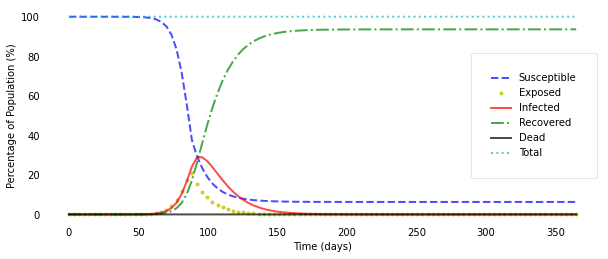

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
#-----------------------------------------------------------------------------------------
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, (S/N)*100, 'b--', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, (E/N)*100, 'y.', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, (I/N)*100, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, (R/N)*100, 'g-.', alpha=0.7, linewidth=2, label='Recovered')
  
    if D is not None:
        ax.plot(t, D/N, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, ((S+E+I+R+D)/N)*100, 'c:', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, ((S+E+I+R)/N)*100, 'c:', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')
    ax.set_ylabel('Percentage of Population (%)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

    if R0 is not None or CFR is not None:
       f = plt.figure(figsize=(12,4))
    
    if R0 is not None:
        # sp1
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
        # sp2
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

      plt.show();
#-----------------------------------------------------------------------------------------
# System of differential equations (model)
def deriv(y, t, N, beta, gamma, delta, alpha, rho, protect):
    S, E, I, R, D, P = y
    dSdt = -beta(t) * S * I / N - protect*S/N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    dPdt = protect*S/N
    return dSdt, dEdt, dIdt, dRdt, dDdt, dPdt
#------------------------------------------------------------------------------------------
z = int(input("How many days was compulsory mask wearing delayed? "))

def mask(t):
  mask = (1-0.4)/(1+np.exp(-5*(-t+z))) + 0.4
  return mask 
#------------------------------------------------------------------------------------------
# Epidemiological Parameters: 

N = 5_600_000
D = 11     # Number of days a sick person remains infectious
gamma = 1.0 / D
delta = 1.0 / 5.0  # Incubation period of 5 days
R_0 = 5.7 # Originally 5.0. BBC reports that R_0 for D614G increases up to 0.7.
alpha = 0.064/100  # 20% death rate
rho = 1/9          # 9 days from infection until death
protect = 0.8
S0, E0, I0, R0, D0, P0 = N-1, 1, 0, 0, 0, 0  # initial conditions: one individual exposed

def beta (t): 
  return R_0 * gamma * mask(t)

def Imax():
  max_I= int(I.max())
  return max_I
#-------------------------------------------------------------------------------------------
t = np.linspace(0, 365, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, P0  # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho, protect))
S, E, I, R, D, P = ret.T
max_z = Imax()/5600000
max_t_z = t[I.argmax(int(max_z))]
print('Day Peak Infection occurs: ', int(max_t_z))
print('Maximum Infected (% of population): ', max_z*100)
plotseird(t, S, E, I, R, D)

Scenario 2: Gradual Non-compliance after Phase 2


How many days was compulsory mask wearing delayed? 89
Day Peak Infection occurs:  95
Maximum Infected (% of population):  28.953517857142856


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:86: RuntimeWarning: overflow encountered in exp


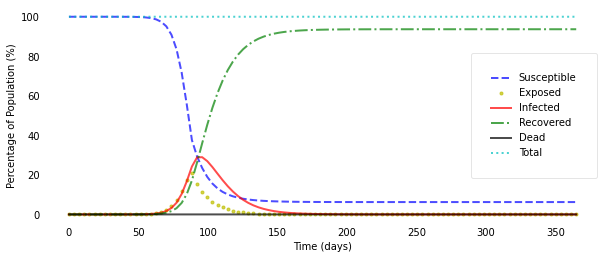

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
#-----------------------------------------------------------------------------------------
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
  f, ax = plt.subplots(1,1,figsize=(10,4))
  ax.plot(t, (S/N)*100, 'b--', alpha=0.7, linewidth=2, label='Susceptible')
  ax.plot(t, (E/N)*100, 'y.', alpha=0.7, linewidth=2, label='Exposed')
  ax.plot(t, (I/N)*100, 'r', alpha=0.7, linewidth=2, label='Infected')
  ax.plot(t, (R/N)*100, 'g-.', alpha=0.7, linewidth=2, label='Recovered')
 
  if D is not None:
    ax.plot(t, D/N, 'k', alpha=0.7, linewidth=2, label='Dead')
    ax.plot(t, ((S+E+I+R+D)/N)*100, 'c:', alpha=0.7, linewidth=2, label='Total')
  else:
    ax.plot(t, ((S+E+I+R)/N)*100, 'c:', alpha=0.7, linewidth=2, label='Total')

  ax.set_xlabel('Time (days)')
  ax.set_ylabel('Percentage of Population (%)')

  ax.yaxis.set_tick_params(length=0)
  ax.xaxis.set_tick_params(length=0)
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')
  legend = ax.legend(borderpad=2.0)
  legend.get_frame().set_alpha(0.5)
  for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)
  if L is not None:
      plt.title("Lockdown after {} days".format(L))
  plt.show();

  if R0 is not None or CFR is not None:
    f = plt.figure(figsize=(12,4))
  
  if R0 is not None:
    # sp1
    ax1 = f.add_subplot(121)
    ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

    ax1.set_xlabel('Time (days)')
    ax1.title.set_text('R_0 over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax1.yaxis.set_tick_params(length=0)
    ax1.xaxis.set_tick_params(length=0)
    ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax1.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

  if Alpha is not None:
    # sp2
    ax2 = f.add_subplot(122)
    ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')

    ax2.set_xlabel('Time (days)')
    ax2.title.set_text('fatality rate over time')
    # ax.set_ylabel('Number (1000s)')
    # ax.set_ylim(0,1.2)
    ax2.yaxis.set_tick_params(length=0)
    ax2.xaxis.set_tick_params(length=0)
    ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax2.legend()
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
      ax.spines[spine].set_visible(False)

    plt.show();
#-----------------------------------------------------------------------------------------
# System of differential equations (model)
def deriv(y, t, N, beta, gamma, delta, alpha, rho, protect):
    S, E, I, R, D, P = y
    dSdt = -beta(t) * S * I / N - protect*S/N
    dEdt = beta(t) * S * I / N - delta * E
    dIdt = delta * E - (1 - alpha) * gamma * I - alpha * rho * I
    dRdt = (1 - alpha) * gamma * I
    dDdt = alpha * rho * I
    dPdt = protect*S/N
    return dSdt, dEdt, dIdt, dRdt, dDdt, dPdt
#------------------------------------------------------------------------------------------
z = int(input("How many days was compulsory mask wearing delayed? "))

def mask(t):
  mask = (1-0.4)/(1+np.exp(-5*(-t+z))) + (0.4-0.5)/(1+np.exp(-(-t+154))) + 0.5
  return mask 
#------------------------------------------------------------------------------------------
# Epidemiological Parameters: 

N = 5_600_000
D = 11     # Number of days a sick person remains infectious
gamma = 1.0 / D    # Proportion of infected recovering per day
delta = 1.0 / 5.0  # Incubation period of 5 days
R_0 = 5.7 # Originally 5.0. BBC reports that R_0 for D614G increases up to 0.7.
alpha = 0.064/100  # 20% death rate
rho = 1/9          # 9 days from infection until death
protect = 0.8
S0, E0, I0, R0, D0, P0 = N-1, 1, 0, 0, 0, 0  # initial conditions: one individual exposed

def beta (t): 
  return R_0 * gamma * mask(t)

def Imax():
  max_I= int(I.max())
  return max_I
#-------------------------------------------------------------------------------------------
t = np.linspace(0, 365, 100) # Grid of time points (in days)
y0 = S0, E0, I0, R0, D0, P0  # Initial conditions vector

# Integrate the SEIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(N, beta, gamma, delta, alpha, rho, protect))
S, E, I, R, D, P = ret.T
max_z = Imax()/5600000
max_t_z = t[I.argmax(int(max_z))]
print('Day Peak Infection occurs: ', int(max_t_z))
print('Maximum Infected (% of population): ', max_z*100)
plotseird(t, S, E, I, R, D)


Scenario 3: 90 Days Time-limited Immunity 

How many days was compulsory mask wearing delayed? 89
Day peak infection occurs:  90
Max % infected:  28.46892857142857


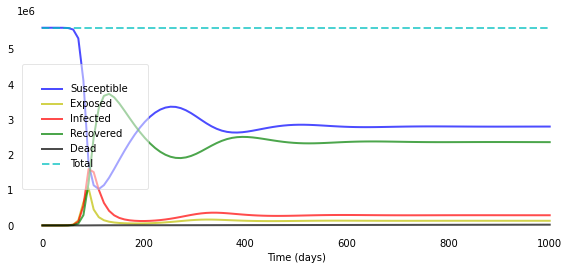

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.integrate import odeint
#-----------------------------------------------------------------------------------------
def plotseird(t, S, E, I, R, D=None, L=None, R0=None, Alpha=None, CFR=None):
    f, ax = plt.subplots(1,1,figsize=(10,4))
    ax.plot(t, S, 'b', alpha=0.7, linewidth=2, label='Susceptible')
    ax.plot(t, E, 'y', alpha=0.7, linewidth=2, label='Exposed')
    ax.plot(t, I, 'r', alpha=0.7, linewidth=2, label='Infected')
    ax.plot(t, R, 'g', alpha=0.7, linewidth=2, label='Recovered')
    if D is not None:
        ax.plot(t, D, 'k', alpha=0.7, linewidth=2, label='Dead')
        ax.plot(t, S+E+I+R+D, 'c--', alpha=0.7, linewidth=2, label='Total')
    else:
        ax.plot(t, S+E+I+R, 'c--', alpha=0.7, linewidth=2, label='Total')

    ax.set_xlabel('Time (days)')

    ax.yaxis.set_tick_params(length=0)
    ax.xaxis.set_tick_params(length=0)
    ax.grid(b=True, which='major', c='w', lw=2, ls='-')
    legend = ax.legend(borderpad=2.0)
    legend.get_frame().set_alpha(0.5)
    for spine in ('top', 'right', 'bottom', 'left'):
        ax.spines[spine].set_visible(False)
    if L is not None:
        plt.title("Lockdown after {} days".format(L))
    plt.show();

    if R0 is not None or CFR is not None:
        f = plt.figure(figsize=(12,4))
    
    if R0 is not None:
        # sp1
        ax1 = f.add_subplot(121)
        ax1.plot(t, R0, 'b--', alpha=0.7, linewidth=2, label='R_0')

        ax1.set_xlabel('Time (days)')
        ax1.title.set_text('R_0 over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax1.yaxis.set_tick_params(length=0)
        ax1.xaxis.set_tick_params(length=0)
        ax1.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax1.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    if Alpha is not None:
        # sp2
        ax2 = f.add_subplot(122)
        ax2.plot(t, Alpha, 'r--', alpha=0.7, linewidth=2, label='alpha')
        ax2.set_xlabel('Time (days)')
        ax2.title.set_text('fatality rate over time')
        # ax.set_ylabel('Number (1000s)')
        # ax.set_ylim(0,1.2)
        ax2.yaxis.set_tick_params(length=0)
        ax2.xaxis.set_tick_params(length=0)
        ax2.grid(b=True, which='major', c='w', lw=2, ls='-')
        legend = ax2.legend()
        legend.get_frame().set_alpha(0.5)
        for spine in ('top', 'right', 'bottom', 'left'):
            ax.spines[spine].set_visible(False)

    plt.show();
#-----------------------------------------------------------------------------------------
# System of differential equations (model)
def model(v, t, N, beta, delta, alpha, gamma, rho, epsilon):
    S, E, I, R, D = v
    
    dSdt = -(beta(t)*S*I)/N + epsilon * R
    dEdt = (beta(t)*S*I)/N - delta*E
    dIdt = delta*E - (1 - alpha)*gamma*I - alpha*rho*I
    dRdt = (1 - alpha)*gamma*I - epsilon * R
    dDdt = alpha*rho*I
    
    return dSdt,dEdt,dIdt,dRdt,dDdt
#-----------------------------------------------------------------------------------------
# Epidemiological Parameters
N = 5_600_000
D = 11     # Number of days a sick person remains infectious
gamma = 1/D # Proportion of infected recovering per day
delta = 1/5 # Incubation period of 5 days
alpha = 0.064/100 # Death rate
rho = 1/9 # 9 days from infection until death
epsilon = 1/90 # rate at which recovered becomes susceptible again (90 days immunity)

S0, E0, I0, R0, D0 = N-1, 1, 0, 0, 0

#-----------------------------------------------------------------------------------------
z = int(input("How many days was compulsory mask wearing delayed? "))

def R_0(t):
    if t > z:
        R_0 = (5 - 2)/(1 + np.exp(-0.5*(-t + z))) + 2
    else:
        R_0 = 5.7  # Originally 5.0. BBC reports that R_0 for D614G increases up to 0.7.
    return R_0

def beta(t):
    return R_0(t)*gamma

t = np.linspace(0, 1000, 100)
v0 = S0, E0, I0, R0, D0 # initial conditions vector

ret = odeint(model, v0, t, args=(N, beta, delta, alpha, gamma, rho, epsilon))
S, E, I, R, D = ret.T

max_infection = int(I.max())/5600000
peak_infection = t[I.argmax(int(max_infection))]

print('Day peak infection occurs: ', int(peak_infection))
print('Max % infected: ', max_infection*100)
plotseird(t, S, E, I, R, D)
